# NLP Author Classification Case

## Context

Original context:

*Dear colleagues,*

*As you know, NLP is a very useful skill in a data scientist toolbox.*
*You have had the opportunity to discover this during a social Thursday, now it is time to rise and shine !*

*To this end, we will be hosting a case ~~competition~~ training so that everybody can experience this ~~wonderful and life-changing experiment~~ that is classifying text.*

This is my go at the challenge where we need to classify a (multiple) sentence(s) to an author :) 

## Setup

In [13]:
#Import base packages
import os
import sys
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import seaborn as sns

proj_dir = os.path.abspath(os.path.join(os.path.dirname(globals()['_dh'][0])))
sys.path.append(proj_dir)

In [14]:
#If you will be modifying the packages
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
#Import local packages
from src.config import Config
from src.data import construct_training_dataframe
from src.apply import apply_fastai_model, apply_fastai_model_on_sentence

In [17]:
#Setup config
config = Config()

## EDA

#### Load data

The data cleaning from the original files take some time. If you want to save it, you can download the pre-cleanded dataset from a this [sharepoint link](https://agilytic-my.sharepoint.com/:x:/g/personal/jerome_agilytic_be/EcqMEgTAYW9IhOI-SBnyGg8BU80M7aENcMk_55Y8d8Snvw?e=ZxMXqc), and save it in the location: `./data/interim/` 

In [15]:
#Clean input data if not done or downloaded yet
raw_data_directory = '{}training/'.format(config.get_raw_data_path()) #default, change if necessary
training_df_path = '{}training.csv'.format(config.get_interim_data_path()) #default, change if necessary

if os.path.isfile(training_df_path):
    print('Training file exists')
else:
    print('Creating new dataframe from directory, this can take a while')
    construct_training_dataframe(directory=raw_data_directory)
    
#Load data
training_df = pd.read_csv(training_df_path)
print('Data loaded')

Training file exists
Data loaded


#### Analyze dataset

First let's look at the raw data:

In [6]:
training_df.head()

,id,text,author
0,1,Idris was well content with this resolve of mi...,MWS
1,2,"I was faint, even fainter than the hateful mod...",HPL
2,3,"Above all, I burn to know the incidents of you...",EAP
3,4,"He might see, perhaps, one or two points with ...",EAP
4,5,All obeyed the Lord Protector of dying England...,MWS


Let's analyze the distribution of the target in 'author' column.

There are three authors:

In [20]:
training_df['author'].unique()

array(['MWS', 'HPL', 'EAP'], dtype=object)

They are distributed as follows:

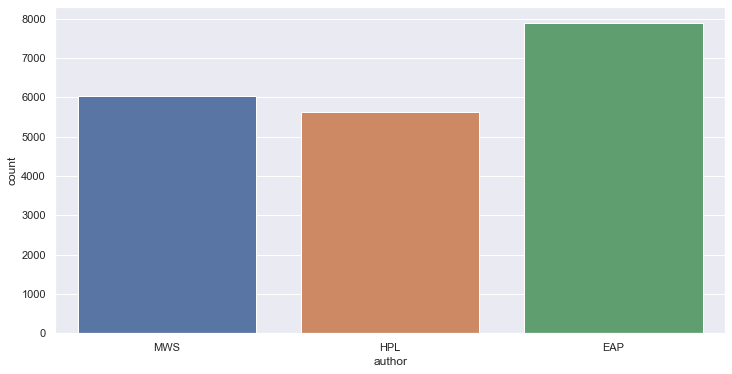

In [21]:
sns.set()
plt.figure(figsize=(12, 6))
sns.countplot(training_df['author'])

Now let's do a basic analysis of the text lengths

In [22]:
training_df['text_length'] = training_df['text'].str.len()
training_df.head(1)

,id,text,author,text_length
0,1,Idris was well content with this resolve of mi...,MWS,50


In [23]:
#Describe for every author:
for author in training_df['author'].unique():
    print('Analysis for {}:'.format(author))
    print(training_df[training_df['author']==author].describe())
    print('\n')

Analysis for MWS:
                 id  text_length
count   6044.000000  6044.000000
mean   13841.571310   152.659828
std     8033.026254   126.305008
min        1.000000    22.000000
25%     6951.000000    85.000000
50%    13666.000000   131.000000
75%    20753.500000   193.000000
max    27971.000000  4664.000000


Analysis for HPL:
                 id  text_length
count   5634.000000  5634.000000
mean   13933.704295   156.817891
std     8049.245063    81.987656
min        2.000000    22.000000
25%     6996.000000    99.000000
50%    13916.000000   143.000000
75%    20866.750000   197.000000
max    27965.000000   901.000000


Analysis for EAP:
                 id  text_length
count   7899.000000  7899.000000
mean   14000.952272   143.236106
std     8113.753477   105.766726
min        3.000000    22.000000
25%     6924.000000    69.000000
50%    13943.000000   116.000000
75%    21066.500000   187.000000
max    27967.000000  1534.000000




You can see that the means are relatively similar, but that there are some outliers in text length

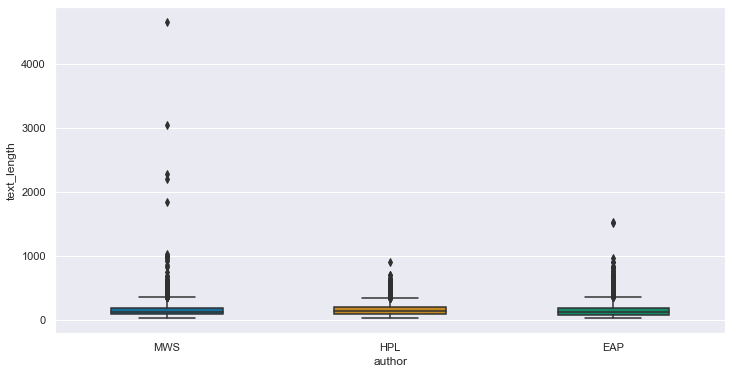

In [24]:
plt.figure(figsize=(12, 6))
bplot = sns.boxplot(y='text_length', 
                    x='author', 
                    data=training_df, 
                    width=0.5,
                    palette="colorblind")

### Training models

Different modelling techniques were tried out:

For features:
- Tfidf 
- Count vectors

Combined with these algorithms:
- Logistic Regression 
- Ranom forests
- Multinomial Naive Bayes

The results varied between 70% and 84% accuracy on a held out test set

**What worked best:**
In the end I opted for a deep learning model based on Transfer Learning, using the [Fastai libray](https://www.fast.ai/)
 library.
 
Fastai is a library built on top of pytorch, aiming at easily applying state of the art deep learning techniques

This particalar model was trained using ULM_fit model for transfer learning language learned from millions of wikipedia pages. 

**The end result was 86% accuracy on the test set**

Because it is ressource intensive, I used Google Colab for free GPU power. See the script in ./scripts/train_ulm_fit.ipynb

### Applying model

We can now apply the model using the following function:

In [25]:
apply_fastai_model_on_sentence('Idris was very content')

C:\Users\Jerome\Anaconda3\envs\nlp_author_case\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\Jerome\Anaconda3\envs\nlp_author_case\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.sparse.Embedding' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
C:\Users\Jerome\Anaconda3\envs\nlp_author_case\lib\site-packages\torch\serialization.py:454: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you

C:\Users\Jerome\Anaconda3\envs\nlp_author_case\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


'MWS'

It is also possible to apply the model to a dataframe

But without GPU this can be rather slow:

In [ ]:
input_path = training_df_path
max_number_of_rows = 10
apply_fastai_model(input_path, max_number_of_rows)

This is the run on the whole dataset, but it is slow (+-40 minutes for 20k lines):

In [41]:
input_path = training_df_path
result = apply_fastai_model(input_path)

y_real = training_df['author']
predicted = result['prediction']
print("Model Accuracy:",metrics.accuracy_score(y_real, predicted))

   id                                               text author
0   1  Idris was well content with this resolve of mi...    MWS
1   2  I was faint, even fainter than the hateful mod...    HPL
2   3  Above all, I burn to know the incidents of you...    EAP
3   4  He might see, perhaps, one or two points with ...    EAP
4   5  All obeyed the Lord Protector of dying England...    MWS


Model Accuracy: 0.9653675231138581


### API

In order to industrialize the model, an api was made. 
This way it can be run on a server, with GPU if it nees to handle large datasets or with CPU if it is the occasional request

To run it:
1. Check the adress and port in the config file: `./config/config.yml`
2. Open Anaconda prompt: activate nlp_author_case
3. Go to the root folder of this project
4. Run `python ./src/api.py`

For now it only classifies sentences using a url similar to http://localhost:5000/sentence?sentence=%22Idris%20was%20very%20content%22

If it does not responds, your antivirus (like F-secure) sometimes blocks certain port.

### Contact

For any questions, don't hesitate to contact me, Jérôme Belpaire, at jerome@agilytic.be